In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

In [8]:
num_samples = 5
cap = 11
lambdas = [0.25, 0.25]
bounds = [[0, 1], [1, 2], [-2, -1]]

np.random.seed(0)

In [9]:
# sample slopes
slopes = [
    np.random.uniform(bounds[i][0], bounds[i][1], (num_samples, 1))
    for i in range(len(bounds))
]
slopes = np.concatenate(slopes, axis=1)  # shape: (num_samples, 3)

In [10]:
slopes

array([[ 0.5488135 ,  1.64589411, -1.20827496],
       [ 0.71518937,  1.43758721, -1.47110508],
       [ 0.60276338,  1.891773  , -1.43195544],
       [ 0.54488318,  1.96366276, -1.07440336],
       [ 0.4236548 ,  1.38344152, -1.92896394]])

In [11]:
durations = [
    np.random.exponential(1 / lambd, (num_samples, 1)) for lambd in lambdas
]
durations = np.concatenate(durations, axis=1)  # shape: (num_samples, 2)
durations

array([[ 0.36464412, 15.38088735],
       [ 0.08170235,  6.42095824],
       [ 7.14995072,  2.47571783],
       [ 6.02313693,  6.06614391],
       [ 8.16125712,  0.50349765]])

In [12]:
peaks = np.clip(np.sum(slopes[:, :2] * durations, axis=1), a_min=None, a_max=cap)
peaks

array([11.        ,  9.28912009,  8.99322459, 11.        ,  4.1541153 ])

In [13]:
taus = -1 * peaks / slopes[:, 2] + np.sum(durations, axis=1)
taus

array([24.84941953, 12.81704303, 15.90604876, 22.32752132, 10.81830218])

In [14]:
time_stamps = np.random.uniform(0, taus, num_samples)
time_stamps

array([15.90166593,  1.83736525, 15.02594985, 11.65157953,  4.48593817])

In [15]:
# compute the viral loads corresponding to the sampled timestamps
viral_loads = np.clip(
    np.clip(time_stamps, a_min=None, a_max=durations[:, 0]) * slopes[:, 0],
    a_min=None,
    a_max=cap,
)
viral_loads = np.clip(
    np.clip(time_stamps - durations[:, 0], a_min=0, a_max=durations[:, 1])
    * slopes[:, 1]
    + viral_loads,
    a_min=None,
    a_max=cap,
)
viral_loads = (
    np.clip(time_stamps - np.sum(durations[:, :2], axis=1), a_min=0, a_max=None)
    * slopes[:, 2]
    + viral_loads
)
viral_loads

array([10.81134665,  2.58235119,  1.26026241, 11.        ,  1.90048924])

In [16]:
viral_loads, time_stamps, peaks

(array([10.81134665,  2.58235119,  1.26026241, 11.        ,  1.90048924]),
 array([15.90166593,  1.83736525, 15.02594985, 11.65157953,  4.48593817]),
 array([11.        ,  9.28912009,  8.99322459, 11.        ,  4.1541153 ]))

In [17]:
from seirsplus.calibration import gen_vl_distrbution

In [52]:
num_samples = 100000
cap = 11
lambdas = [0.15, 0.15]
bounds = [[0.5, 1], [1, 1.25], [-0.5, -0.2]]

In [53]:
viral_loads, time_stamps, peaks = gen_vl_distrbution(bounds=bounds, lambdas=lambdas, cap=cap, num_samples=num_samples)

In [54]:
import matplotlib.pyplot as plt

(array([9503., 8794., 7925., 7156., 6521., 5843., 5558., 5020., 4614.,
        4295., 3867., 3522., 3339., 3075., 2829., 2603., 2545., 2368.,
        2144., 8479.]),
 array([1.41127297e-04, 5.50134071e-01, 1.10012701e+00, 1.65011996e+00,
        2.20011290e+00, 2.75010585e+00, 3.30009879e+00, 3.85009173e+00,
        4.40008468e+00, 4.95007762e+00, 5.50007056e+00, 6.05006351e+00,
        6.60005645e+00, 7.15004939e+00, 7.70004234e+00, 8.25003528e+00,
        8.80002823e+00, 9.35002117e+00, 9.90001411e+00, 1.04500071e+01,
        1.10000000e+01]),
 <BarContainer object of 20 artists>)

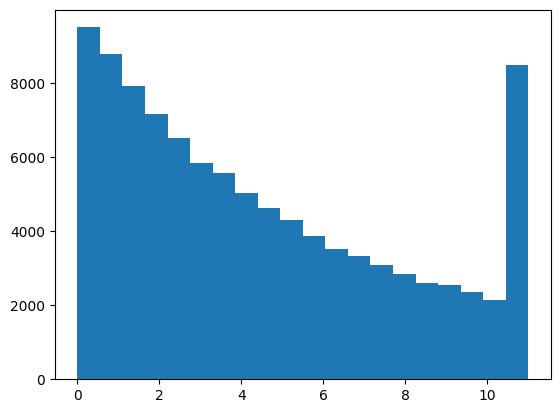

In [55]:
plt.hist(viral_loads, bins=20)

(array([  769.,  1720.,  2253.,  2606.,  2868.,  2908.,  3064.,  3147.,
         3054.,  3102.,  3059.,  3041.,  2924.,  2879.,  2916.,  2745.,
         2619.,  2577.,  2387., 49362.]),
 array([1.08588543e-02, 5.60315912e-01, 1.10977297e+00, 1.65923003e+00,
        2.20868708e+00, 2.75814414e+00, 3.30760120e+00, 3.85705826e+00,
        4.40651531e+00, 4.95597237e+00, 5.50542943e+00, 6.05488648e+00,
        6.60434354e+00, 7.15380060e+00, 7.70325766e+00, 8.25271471e+00,
        8.80217177e+00, 9.35162883e+00, 9.90108589e+00, 1.04505429e+01,
        1.10000000e+01]),
 <BarContainer object of 20 artists>)

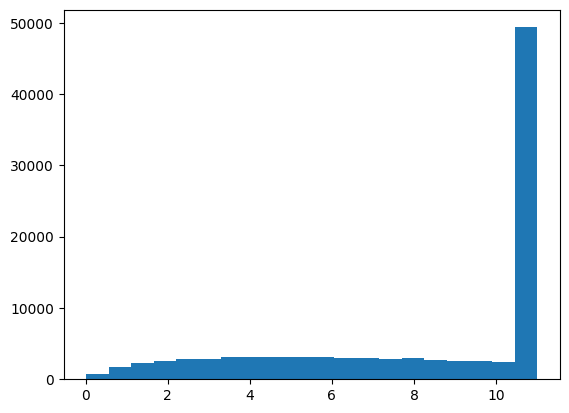

In [42]:
plt.hist(peaks, bins=20)